# (Machine Learning (Classification))


## I will use my MapMyRun dataset for this analysis. In order to add classification, I will have to use the pandas feature of categorizing sets into bins. Here we go!

### Import Packages and Data

In [1]:
#Import the sklearn datasets
#%pip install sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [2]:
#I will be using my own dataset from github
data = pd.read_csv(r"https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv")

In [3]:
#data.columns will give me the exact name of the column headers in the dataset
#this also will allow you to visually inspect if there are leading or trailing spaces in the names
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link'],
      dtype='object')

## Brief Description of my Dataset:

Date Submitted: The date the workout was submitted - this could be different than the workout date if the workout was near midnight or if it was manually submitted on a different date.

Workout Date: The date of the workout.

Activity Type: The type of workout (primarily Running or Walking)

Calories Burned (kCal): The number of calories burned during the workout

Distance (mi): The number of miles run in the iteration

Workout Time (seconds): The number of seconds the workout lasted. I will later turn this into minutes

Avg Pace (min/mi): Average pace of the activity

Max Pace: Max pace achieved during the workout

Avg Speed (mi/h): The miles per hour measurement of the activity

Max Speed: The max speed captured during the activity

Avg Heart Rate: Average Heart Rate during the activity

Steps: The number of steps captured

Notes: Any notes captured

Source: Where the data came from

Link: Link to the specific workout on MapMyRun

## EDA

In [4]:
#printing the data to see what it includes
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,473.000000,693.000000
mean,403.050209,3.118550,2423.331939,12.992997,2.055700,5.462198,46.161752,108.382664,5561.008658
std,282.186703,1.984955,4643.550402,18.588807,7.689155,1.797246,130.824380,62.239112,9763.279738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,234.000000,2.000000,1466.000000,9.064520,0.000000,4.869110,0.000000,91.000000,3388.000000
50%,403.000000,3.100000,1800.000000,9.743940,0.861617,6.096190,17.007000,143.000000,4662.000000
75%,454.000000,3.540000,2344.000000,11.142900,1.546500,6.549300,60.147500,153.000000,5766.000000
max,2473.000000,13.481600,80568.000000,295.261503,182.396000,14.863700,1853.550000,169.000000,193886.000000


In [5]:
data.info()
#printing the data to see what it includes and what it is missing
#You will notice there are missing items in Avg. Heart Rate and Steps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          717 non-null    object 
 1   Workout Date            717 non-null    object 
 2   Activity Type           717 non-null    object 
 3   Calories Burned (kCal)  717 non-null    int64  
 4   Distance (mi)           717 non-null    float64
 5   Workout Time (seconds)  717 non-null    int64  
 6   Avg Pace (min/mi)       717 non-null    float64
 7   Max Pace (min/mi)       717 non-null    float64
 8   Avg Speed (mi/h)        717 non-null    float64
 9   Max Speed (mi/h)        717 non-null    float64
 10  Avg Heart Rate          473 non-null    float64
 11  Steps                   693 non-null    float64
 12  Notes                   717 non-null    object 
 13  Source                  717 non-null    object 
 14  Link                    717 non-null    ob

In [6]:
data.isnull().sum()
#printing the data to see what it includes and what it is missing
#I will be using the dataframe.dropna() method to drop the missing values
#First I want to mix the mean HR into the avg heart rate

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            244
Steps                      24
Notes                       0
Source                      0
Link                        0
dtype: int64

In [7]:
meanhrdf = data
meanhrdf.dropna


<bound method DataFrame.dropna of     Date Submitted Workout Date     Activity Type  Calories Burned (kCal)  \
0       2022-08-11   2022-08-11               Run                     576   
1       2022-08-10   2022-08-10               Run                     863   
2       2022-08-09   2022-08-09               Run                     626   
3       2022-08-08   2022-08-08               Run                     797   
4       2022-08-06   2022-08-06              Walk                     290   
..             ...          ...               ...                     ...   
712     2019-05-13   2019-05-13  Indoor Run / Jog                     191   
713     2016-10-19   2016-10-19     Class Workout                     186   
714     2016-10-12   2016-10-12     Class Workout                     183   
715     2016-09-26   2016-09-26     Class Workout                     186   
716     2016-08-12   2016-08-12     Class Workout                     189   

     Distance (mi)  Workout Time (seconds

In [8]:
mean_HR = meanhrdf['Avg Heart Rate'].mean()

#data['Avg Heart Rate'].fillna(method='ffill', inplace=True)
#data['Avg Heart Rate'].astype(int).round(0)
data['Avg Heart Rate'] = data['Avg Heart Rate'].fillna(mean_HR).round(0)
data.isnull().sum()
#data.head(4)
#after filling the missing values I will drop the missing values

Date Submitted             0
Workout Date               0
Activity Type              0
Calories Burned (kCal)     0
Distance (mi)              0
Workout Time (seconds)     0
Avg Pace (min/mi)          0
Max Pace (min/mi)          0
Avg Speed (mi/h)           0
Max Speed (mi/h)           0
Avg Heart Rate             0
Steps                     24
Notes                      0
Source                     0
Link                       0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape
data.head(4)
#The number of rows and columns in the dataset is now reduced to just the events with steps included (runs/walks)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,2022-08-11,2022-08-11,Run,576,4.62746,3712,13.3661,1.546500,4.48896,38.7973,116.0,7878.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6771943882
1,2022-08-10,2022-08-10,Run,863,7.02161,4441,10.5393,0.967622,5.69300,62.0077,144.0,11520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769680244
2,2022-08-09,2022-08-09,Run,626,6.35313,4274,11.2104,1.052290,5.35219,57.0188,145.0,11074.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769551199
3,2022-08-08,2022-08-08,Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.1560,146.0,10360.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667


In [11]:
data['Duration'] = data['Workout Time (seconds)'].astype(int) / 60
data['Duration'].round(2)
#Create a new column for the duration of the workout

0      61.87
1      74.02
2      71.23
3      66.88
4      37.78
       ...  
708    32.43
709    36.62
710    39.07
711    20.23
712    15.45
Name: Duration, Length: 693, dtype: float64

In [12]:
#I will create bins for the data to categorize the data
bins = [0, 2, 3.09, 6.19, 13.0, 20]
labels = ['Short', 'Moderate', '5k', '10k', 'Half-Marathon']
data['Distances'] = pd.cut(data['Distance (mi)'], bins=bins, labels=labels)

In [13]:
#Visually inspect the data
data.head(4)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,Duration,Distances
0,2022-08-11,2022-08-11,Run,576,4.62746,3712,13.3661,1.546500,4.48896,38.7973,116.0,7878.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6771943882,61.866667,5k
1,2022-08-10,2022-08-10,Run,863,7.02161,4441,10.5393,0.967622,5.69300,62.0077,144.0,11520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769680244,74.016667,10k
2,2022-08-09,2022-08-09,Run,626,6.35313,4274,11.2104,1.052290,5.35219,57.0188,145.0,11074.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769551199,71.233333,10k
3,2022-08-08,2022-08-08,Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.1560,146.0,10360.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667,66.883333,10k


In [17]:
data['Distances'].value_counts()

5k               364
Short            158
Moderate         104
10k               62
Half-Marathon      5
Name: Distances, dtype: int64

In [18]:
#set categorical data to numeric

data['5k'] = data['Distance (mi)'].apply(lambda x: 1 if (x > 3.09 and x <= 6.19) else 0)
data['moderate'] = data['Distance (mi)'].apply(lambda x: 1 if (x > 2.0 and x <= 3.09) else 0)
data['short'] = data['Distance (mi)'].apply(lambda x: 1 if (x > 0 and x <= 1.99) else 0)
data['HR'] = data['Avg Heart Rate'].apply(lambda x: 1 if x > 124 else 0)
data['10k'] = data['Distance (mi)'].apply(lambda x: 1 if x > 6.2 and x <= 13.09 else 0)
data['Half Marathon'] = data['Distance (mi)'].apply(lambda x: 1 if x > 13.1 else 0)


In [19]:
data = pd.DataFrame(data)
data.head(4)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),...,Source,Link,Duration,Distances,5k,moderate,short,HR,10k,Half Marathon
0,2022-08-11,2022-08-11,Run,576,4.62746,3712,13.3661,1.546500,4.48896,38.7973,...,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6771943882,61.866667,5k,1,0,0,0,0,0
1,2022-08-10,2022-08-10,Run,863,7.02161,4441,10.5393,0.967622,5.69300,62.0077,...,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769680244,74.016667,10k,0,0,0,1,1,0
2,2022-08-09,2022-08-09,Run,626,6.35313,4274,11.2104,1.052290,5.35219,57.0188,...,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6769551199,71.233333,10k,0,0,0,1,1,0
3,2022-08-08,2022-08-08,Run,797,6.34867,4013,10.5318,0.503541,5.69702,119.1560,...,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6765021667,66.883333,10k,0,0,0,1,1,0


In [20]:
data.info()
data = data[data['Avg Heart Rate'] > 1]
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 712
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Date Submitted          693 non-null    object  
 1   Workout Date            693 non-null    object  
 2   Activity Type           693 non-null    object  
 3   Calories Burned (kCal)  693 non-null    int64   
 4   Distance (mi)           693 non-null    float64 
 5   Workout Time (seconds)  693 non-null    int64   
 6   Avg Pace (min/mi)       693 non-null    float64 
 7   Max Pace (min/mi)       693 non-null    float64 
 8   Avg Speed (mi/h)        693 non-null    float64 
 9   Max Speed (mi/h)        693 non-null    float64 
 10  Avg Heart Rate          693 non-null    float64 
 11  Steps                   693 non-null    float64 
 12  Notes                   693 non-null    object  
 13  Source                  693 non-null    object  
 14  Link                    69

(595, 23)

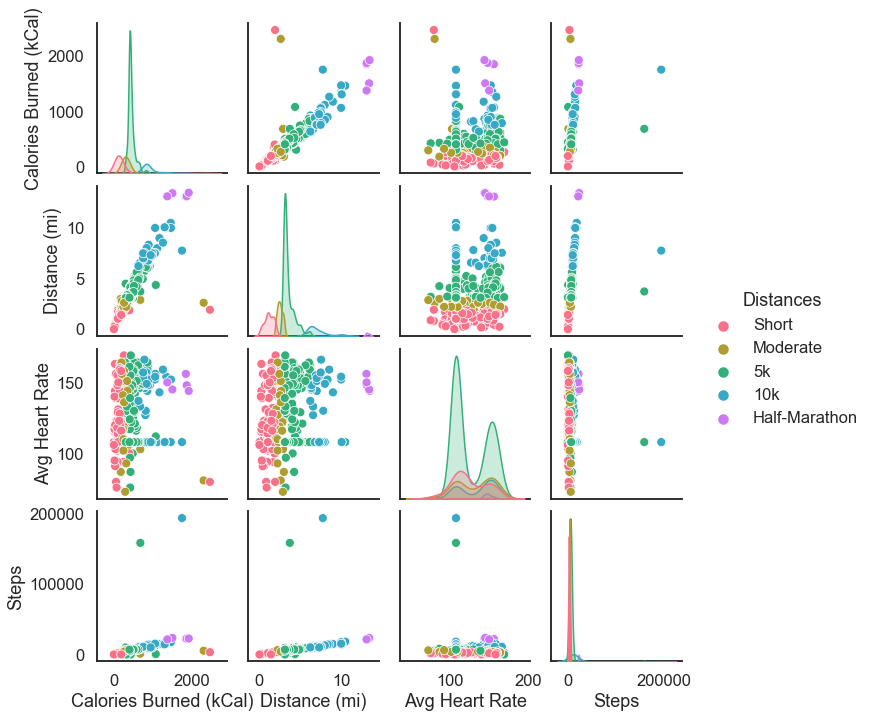

In [21]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data[['Calories Burned (kCal)','Distance (mi)', 'Avg Heart Rate', 'Steps', 'Distances']], palette='husl', hue = 'Distances')

Text(0.5, 0, 'Distance in Miles')

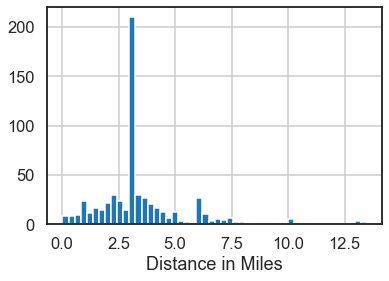

In [22]:
data['Distance (mi)'].hist(bins = 50)
plt.xlabel('Distance in Miles')

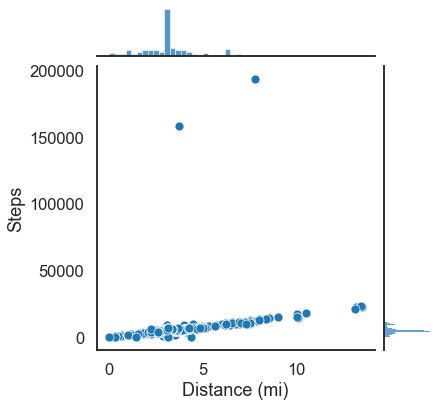

In [23]:
sns.jointplot( x = 'Distance (mi)' , y = 'Steps', data = data)

In [24]:
#In the above jointplot, I can tell there is some incorrect data as the steps are extremely far from the distance. I will drop the outliers.
data = data[data['Steps'] < 50000]

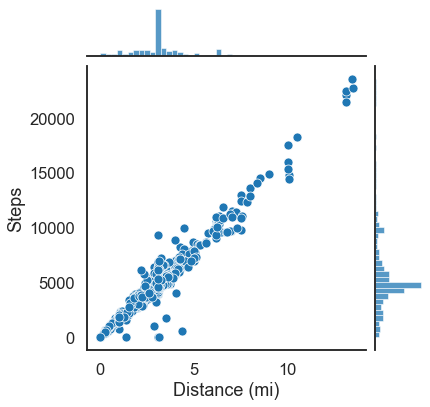

In [25]:
sns.jointplot( x = 'Distance (mi)' , y = 'Steps', data = data)
#The above result looks far more realistic than the previous one.

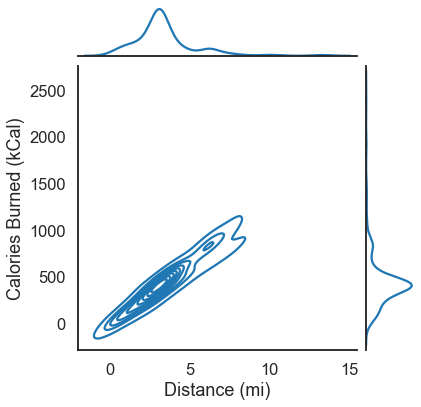

In [26]:
sns.jointplot( x = 'Distance (mi)' , y = 'Calories Burned (kCal)', data = data ,kind ='kde')

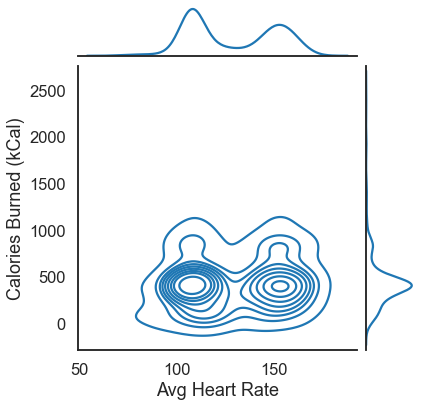

In [27]:
sns.jointplot( x = 'Avg Heart Rate' , y = 'Calories Burned (kCal)', data = data ,kind ='kde')

In [28]:
# sns.set_context('talk')
# sns.set_style('white')
# sns.pairplot(data, hue = 'Distances')

<AxesSubplot:title={'center':'Was it a 5k?'}>

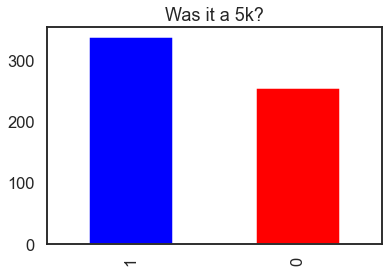

In [29]:
data['5k'].value_counts().plot(kind="bar", color=["blue", "red"], title = 'Was it a 5k?')

ValueError: num must be 1 <= num <= 9, not 10

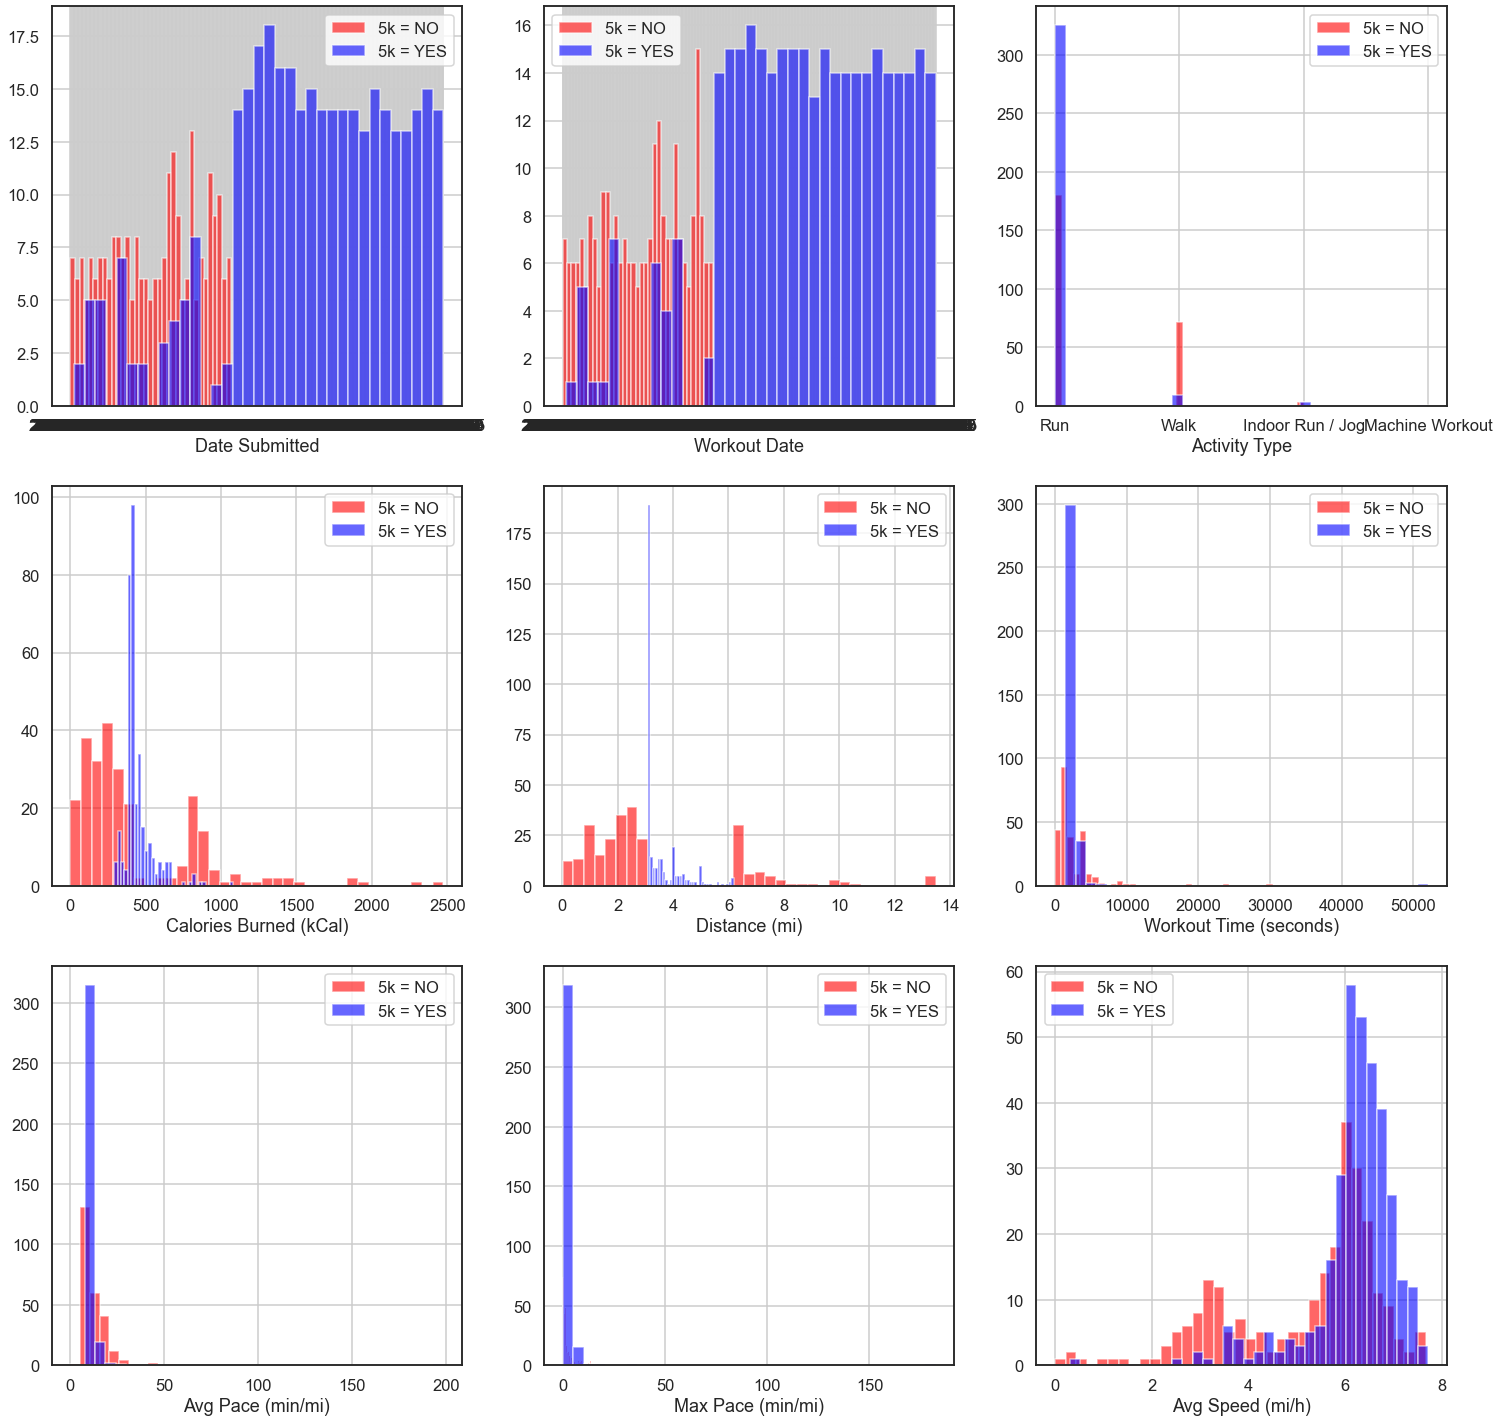

In [30]:
plt.figure(figsize=(25, 25))

for i, column in enumerate(data, 1):
    plt.subplot(3, 3, i)
    data[data["5k"] == 0][column].hist(bins=35, color='red', label='5k = NO', alpha=0.6)
    data[data["5k"] == 1][column].hist(bins=35, color='blue', label='5k = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 712
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Date Submitted          593 non-null    object  
 1   Workout Date            593 non-null    object  
 2   Activity Type           593 non-null    object  
 3   Calories Burned (kCal)  593 non-null    int64   
 4   Distance (mi)           593 non-null    float64 
 5   Workout Time (seconds)  593 non-null    int64   
 6   Avg Pace (min/mi)       593 non-null    float64 
 7   Max Pace (min/mi)       593 non-null    float64 
 8   Avg Speed (mi/h)        593 non-null    float64 
 9   Max Speed (mi/h)        593 non-null    float64 
 10  Avg Heart Rate          593 non-null    float64 
 11  Steps                   593 non-null    float64 
 12  Notes                   593 non-null    object  
 13  Source                  593 non-null    object  
 14  Link                    59

(16.5, -0.5)

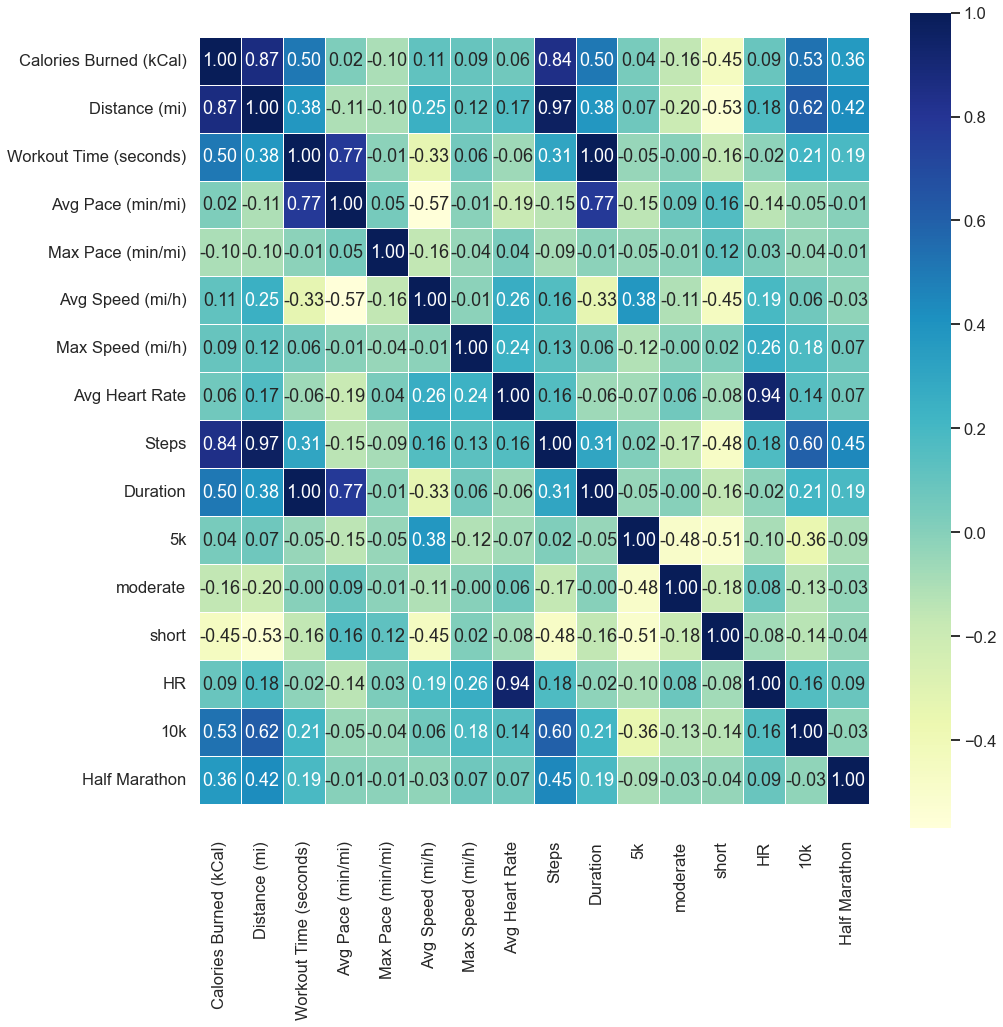

In [32]:
# Studying the correlations between features using Heat Map!
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with 5k'}>

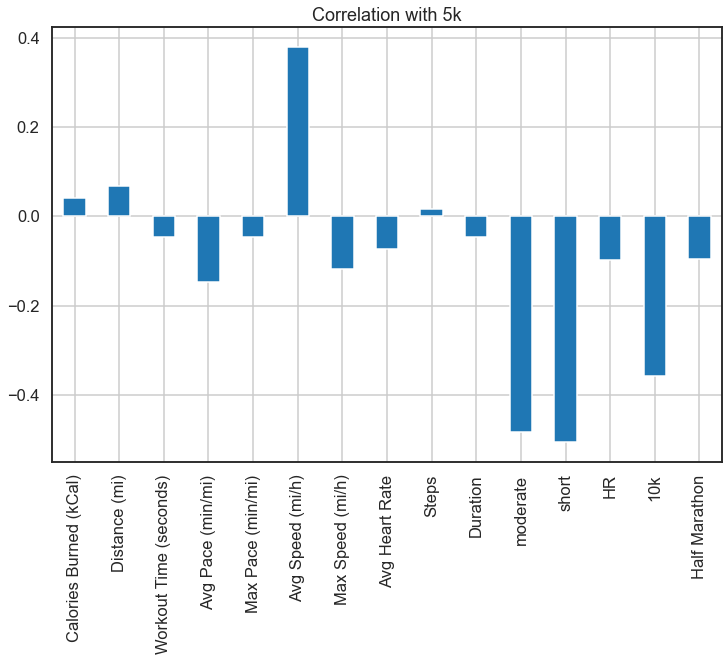

In [33]:
data.drop('5k', axis=1).corrwith(data['5k']).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with 5k")

In [34]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

Date Submitted : ['2022-08-11' '2022-08-10' '2022-08-09' '2022-08-08' '2022-08-06'
 '2022-08-03' '2022-07-30' '2022-07-28' '2022-07-25' '2022-07-24'
 '2022-07-21' '2022-07-20' '2022-07-18' '2022-07-17' '2022-07-14'
 '2022-07-13' '2022-07-12' '2022-07-10' '2022-07-09' '2022-07-08'
 '2022-06-24' '2022-06-23' '2022-06-21' '2022-06-19' '2022-06-18'
 '2022-06-16' '2022-06-15' '2022-06-10' '2022-06-09' '2022-06-06'
 '2022-06-05' '2022-06-04' '2022-06-03' '2022-05-31' '2022-05-30'
 '2022-05-28' '2022-05-27' '2022-05-25' '2022-05-24' '2022-05-22'
 '2022-05-20' '2022-05-17' '2022-05-16' '2022-05-14' '2022-05-13'
 '2022-05-11' '2022-05-09' '2022-05-08' '2022-05-07' '2022-05-06'
 '2022-05-05' '2022-05-03' '2022-05-01' '2022-04-30' '2022-04-29'
 '2022-04-28' '2022-04-27' '2022-04-25' '2022-04-23' '2022-04-22'
 '2022-04-21' '2022-04-19' '2022-04-18' '2022-04-15' '2022-04-10'
 '2022-04-09' '2022-04-03' '2022-03-31' '2022-03-25' '2022-03-20'
 '2022-03-19' '2022-03-14' '2022-03-11' '2022-03-08' '2022-

In [36]:
from sklearn.model_selection import train_test_split
X = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps']]
y = data['5k']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 , random_state = 101)
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
lrpredict = lrmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,lrpredict))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lrpredict)

              precision    recall  f1-score   support

           0       0.72      0.43      0.54        77
           1       0.67      0.87      0.76       101

    accuracy                           0.68       178
   macro avg       0.69      0.65      0.65       178
weighted avg       0.69      0.68      0.66       178



c:\Users\coleb\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[33, 44],
       [13, 88]], dtype=int64)

In [37]:
#This gives us an accuracy of 64%

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[67 10]
 [ 5 96]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        77
           1       0.91      0.95      0.93       101

    accuracy                           0.92       178
   macro avg       0.92      0.91      0.91       178
weighted avg       0.92      0.92      0.92       178



In [39]:
#KNN gives us an accuracy of 89%

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.97      0.98       101

    accuracy                           0.98       178
   macro avg       0.98      0.99      0.98       178
weighted avg       0.98      0.98      0.98       178

[[77  0]
 [ 3 98]]


In [41]:
#Decision Tree gives us an accuracy of 99%

In [42]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

In [43]:
dtree2 = DecisionTreeClassifier(max_leaf_nodes=14, random_state=42, criterion='entropy')
dtree2.fit(X_train,y_train)
predictions = dtree2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        77
           1       1.00      0.97      0.98       101

    accuracy                           0.98       178
   macro avg       0.98      0.99      0.98       178
weighted avg       0.98      0.98      0.98       178

[[77  0]
 [ 3 98]]


In [44]:
#This gives us the same prediction of 99%

## Conclusion

Between the three models, the decision tree model gave the best accuracy score. It resulted in a 99% accuracy both times; whereas the other models ranged between the 60s and 80s

## Insights and Findings

The findings indicate that speed had the closest correlation to whether or not the run was going to be a 5k. The decision tree performed the best most likely due to the nature of the dataset, if the distance was x then y so on and so forth for the different variables.

## Recommendations

Recommendations would be to include additional data or further refine the dataset to see what other factors could possibly be influencing whether or not a 5k would be run. It would seem as though there should be more than just the speed that would determine if the run was going to be a 5k.

# Additional Notes and Testing

### ML

In [45]:
#Now that I have categorized my data I will split it with test/train and test/test

#First I need to eliminate the non-categorical columns

#I will find the list of column headers by using data.columns again
columns = data.columns
columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', 'Duration', 'Distances', '5k', 'moderate', 'short', 'HR', '10k',
       'Half Marathon'],
      dtype='object')

In [47]:
# #I will create the new dataframe with the categorical columns

# holdmydata = data
# #I created holdmydata to hold the dataframe so that I could use it later

# data = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)','Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed','Avg Heart Rate', 'Steps','Duration', '5k', '10k', 'Half Marathon', 'HR']]


In [48]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data.loc[:, data.columns != '5k']
y = data['5k']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Standardize r, R, theta, and Energy (train)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

len(X_test)

ValueError: could not convert string to float: '2020-10-01'

In [50]:
# # Logistic regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score

# lr_clf = LogisticRegression(random_state=42, C=10.0).fit(X_train_s, y_train)
# X_test_s = s.transform(X_test)
# y_pred = lr_clf.predict(X_test_s)
# y_pred_p = lr_clf.predict_proba(X_test_s)

# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
# print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
# print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
# print('Confusion Matrix: ')
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score


In [ ]:
import matplotlib.pyplot as plt

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on 5k distance'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

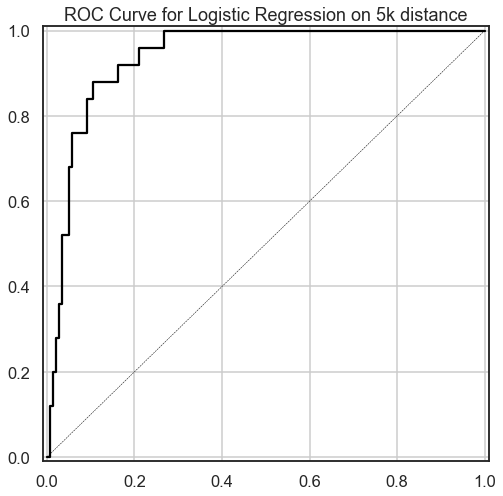

In [ ]:
plot_roc(y_test, y_pred_p[:, 1], 'Logistic Regression')

In [ ]:
# SVM with Gaussian kernel
from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score

svm_clf = SVC(kernel='rbf', gamma=1.0, C=10.0, probability=True).fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = svm_clf.predict(X_test_s)
y_pred_p = svm_clf.predict_proba(X_test_s)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

accuracy is 0.964
f1 score is 0.885
roc-auc is 0.968
Confusion Matrix: 
[[138   4]
 [  2  23]]


In [ ]:
# Benchmark SVM using CV
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[10, 20], 'gamma':(0.001, 0.01, 0.1, 1)}
svm_clf_gscv = GridSearchCV(svm, parameters)

svm_clf_gscv.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = svm_clf_gscv.predict(X_test_s)
y_pred_p = svm_clf_gscv.predict_proba(X_test_s)

print('Model is: ')
print(svm_clf_gscv.best_params_)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Model is: 
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
accuracy is 0.964
f1 score is 0.885
roc-auc is 0.968
Confusion Matrix: 
[[138   4]
 [  2  23]]


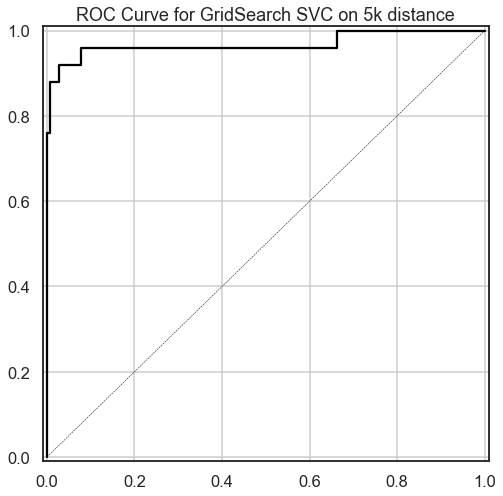

In [ ]:
plot_roc(y_test, y_pred_p[:, 1], 'GridSearch SVC')

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500)

rf_clf.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = rf_clf.predict(X_test_s)
y_pred_p = rf_clf.predict_proba(X_test_s)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

accuracy is 0.994
f1 score is 0.980
roc-auc is 1.000
Confusion Matrix: 
[[142   0]
 [  1  24]]


In [ ]:
# Benchmark RandomForest using CV
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {'criterion':('gini', 'entropy'), 'n_estimators':(100, 200, 300, 400, 500, 1000), 'max_features':(2, 3)}
rf_clf_gscv = GridSearchCV(rf, parameters)

rf_clf_gscv.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = rf_clf_gscv.predict(X_test_s)
y_pred_p = rf_clf_gscv.predict_proba(X_test_s)

print('Model is: ')
print(rf_clf_gscv.best_params_)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score is {:.3f}'.format(f1_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_p[:,1])))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Model is: 
{'criterion': 'gini', 'max_features': 3, 'n_estimators': 200}
accuracy is 0.994
f1 score is 0.980
roc-auc is 1.000
Confusion Matrix: 
[[142   0]
 [  1  24]]


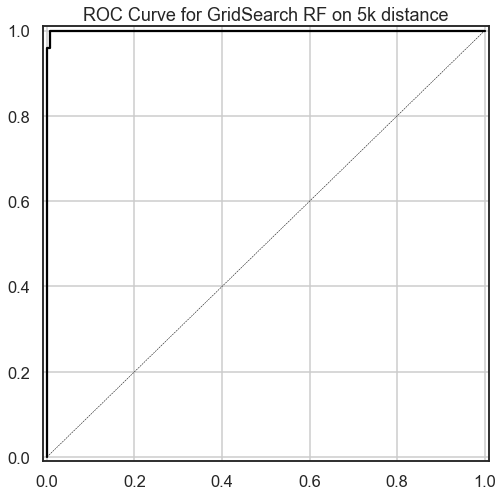

In [ ]:
plot_roc(y_test, y_pred_p[:, 1], 'GridSearch RF')

## Linear Regression Model

### Load Packages from SKLearn

In [ ]:
%matplotlib inline

#Two fold - one fold for train and one fold for testing the#
#ML - how to know which is for train which is for testing

### Linear Regression

In [ ]:
#check for null values
data.isnull().sum()

Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace                  0
Avg Speed (mi/h)          0
Max Speed                 0
Avg Heart Rate            0
Steps                     0
Duration                  0
5k                        0
10k                       0
Half Marathon             0
HR                        0
Distances                 0
dtype: int64

In [ ]:
#we will pull just the "alcohol" values so it is in the form of an array
X = data.loc[:, ['Distance (mi)']].values

In [ ]:
data.dropna(inplace=True)

In [ ]:
# verify the shape of the array (rows by a single column)
X.shape

(653, 1)

In [ ]:
#I will create bins for the data to categorize the data
bins = [0, 20, 30, 50, 100, 150]
labels = [1, 2, 3, 4, 5]
data['Distances'] = pd.cut(data['Duration'], bins=bins, labels=labels)

In [ ]:
#repeat the same process to get our y values
y = data.loc[:, 'Steps'].values

In [ ]:
#verify the shape of the y array
y.shape

(653,)

In [ ]:
data.isnull().sum() 

Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace                  0
Avg Speed (mi/h)          0
Max Speed                 0
Avg Heart Rate            0
Steps                     0
Duration                  0
5k                        0
10k                       0
Half Marathon             0
HR                        0
Distances                 0
dtype: int64

In [ ]:
#data = data.astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression


In [ ]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [ ]:
#set our fit with our arrays
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.predict(X[0].reshape(-1,1))

array([3697.52166279])

In [ ]:
reg.predict(X[0:2])

array([3697.52166279, 3697.52166279])

In [ ]:
score = reg.score(X, y)
print(score)

0.8990311896653813


In [ ]:
reg.coef_

array([1500.93518946])

In [ ]:
reg.intercept_

695.651283875015

In [ ]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 1500.94x + 695.65


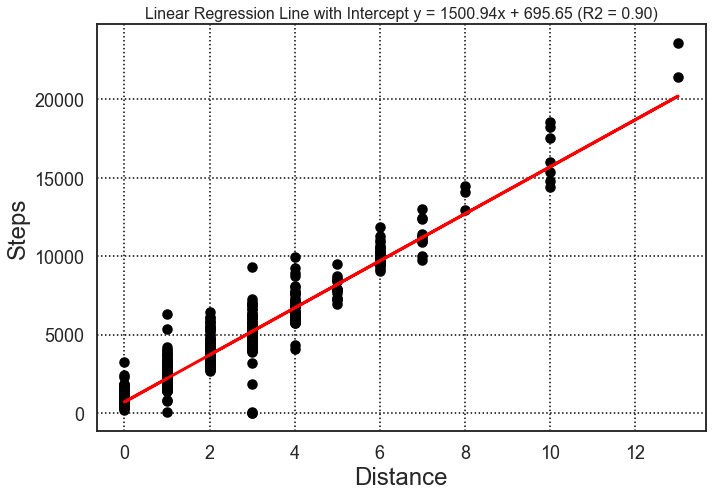

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance', fontsize = 24)
ax.set_ylabel('Steps', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [ ]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

C:\Users\coleb\AppData\Local\Temp/ipykernel_23492/4145620563.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


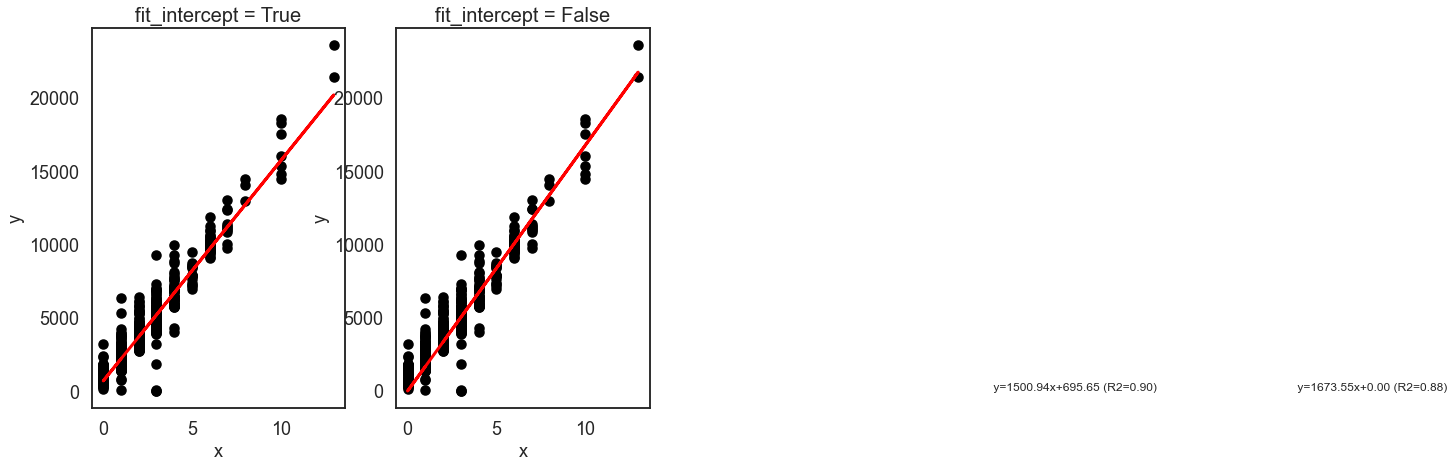

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [ ]:
data.head()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Duration,5k,10k,Half Marathon,HR,Distances
1,370,2,1698,10,1,5,53,159,4431,28,0,0,0,0,2
2,315,2,1391,9,0,6,0,159,3684,23,0,0,0,0,2
3,405,3,1691,9,0,6,0,159,4520,28,1,0,0,0,2
4,428,3,1955,10,3,5,19,0,5052,32,0,0,0,0,3
5,881,6,4182,11,0,5,100,153,10479,69,0,0,0,0,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['Distance (mi)']], data['5k'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.0029090879794188007


## Logistic Regression

### Load Packages

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Regression

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_test[0].reshape(1,-1)

array([[0.06322057]])

In [ ]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 0
probability [[0.84011857 0.15988143]]


In [ ]:
data.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps', 'Duration', '5k', '10k', 'Half Marathon',
       'HR', 'Distances'],
      dtype='object')

In [ ]:
log_df = data
#log_df.loc[:, 'Distance (mi)'] = X_test.reshape(-1)
#log_df.loc[:, '5k'] = y_test.values
log_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [ ]:
log_df.head()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Duration,5k,10k,Half Marathon,HR,Distances,logistic_preds
1,370,2,1698,10,1,5,53,159,4431,28,0,0,0,0,2,0.159881
2,315,2,1391,9,0,6,0,159,3684,23,0,0,0,0,2,0.159881
3,405,3,1691,9,0,6,0,159,4520,28,1,0,0,0,2,0.165192
4,428,3,1955,10,3,5,19,0,5052,32,0,0,0,0,3,0.159881
5,881,6,4182,11,0,5,100,153,10479,69,0,0,0,0,4,0.159881


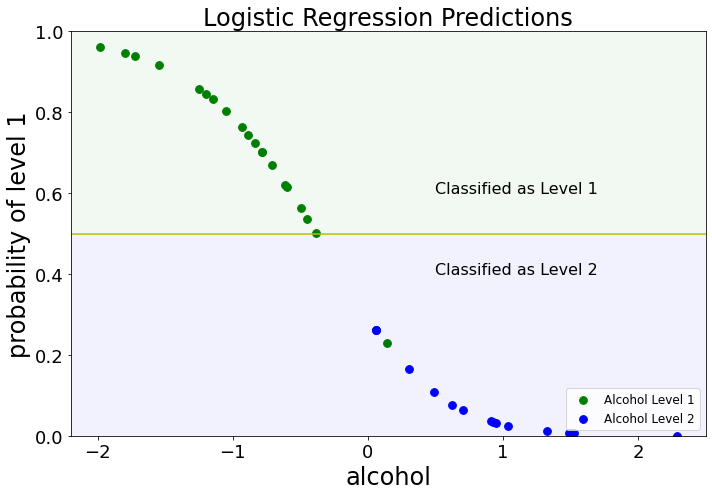

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


alcohol_level_1 = log_df['target'] == 1
alcohol_level_2 = log_df['target'] == 0

ax.scatter(log_df.loc[alcohol_level_1, 'alcohol'].values,
            log_df.loc[alcohol_level_1, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'Alcohol Level 1')


ax.scatter(log_df.loc[alcohol_level_2, 'alcohol'].values,
            log_df.loc[alcohol_level_2, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'Alcohol Level 2')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as Level 1', fontsize = 16)
ax.text(0.5, .4, 'Classified as Level 2', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('alcohol', fontsize = 24)
ax.set_ylabel('probability of level 1', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.datasets import load_wine
wine = load_wine()  
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=11)  # random_state for reproducibility

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()  
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=11)  # random_state for reproducibility

In [ ]:
knn = KNeighborsClassifier() #default is k=5 nearest neighbors

In [ ]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [ ]:
expected_labels = y_test #We also require our expected labels for future analysis.

In [ ]:
predicted_labels = knn.predict(X=X_test)

In [ ]:
print(predicted_labels[:20])

[1 0 1 0 0 0 1 1 2 0 0 1 0 0 2 2 0 1 1 1]


In [ ]:
print(expected_labels[:20])

[2 0 1 0 0 0 1 1 1 0 2 1 0 0 1 1 0 2 1 1]


In [ ]:
predicted_labels[:20] == expected_labels[:20]

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True])

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted_labels, expected_labels) if p != e]

print(wrong)
print(f'The classifier incorrectly predicted {len(wrong)} of {len(expected_labels)} samples.')

[(1, 2), (2, 1), (0, 2), (2, 1), (2, 1), (1, 2), (1, 2), (0, 1), (2, 1), (0, 2), (0, 1), (2, 1)]
The classifier incorrectly predicted 12 of 45 samples.


In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')

73.33%


In [ ]:
confusion = confusion_matrix(y_true=expected_labels, y_pred=predicted_labels)

In [ ]:
confusion

array([[18,  0,  0],
       [ 2, 11,  5],
       [ 2,  3,  4]], dtype=int64)

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))

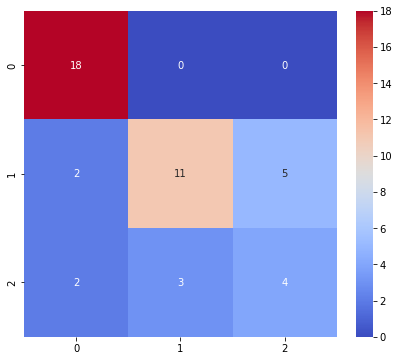

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='coolwarm') 

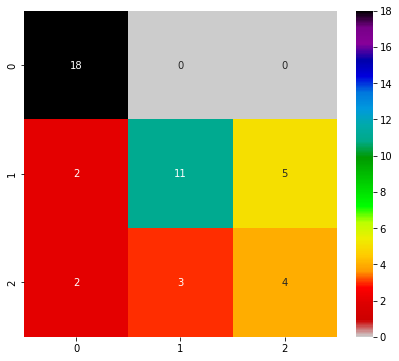

In [ ]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='nipy_spectral_r') 

## K-Fold Class (2 Fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=wine.data, y=wine.target, cv=kfold)

In [ ]:
scores*100

array([74.15730337, 69.66292135])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 71.91%


## K-Fold Class (20 Fold)

In [ ]:
kfold = KFold(n_splits=20, random_state=11, shuffle=True)

In [ ]:
scores = cross_val_score(estimator=knn, X=wine.data, y=wine.target, cv=kfold)

In [ ]:
scores*100

array([77.77777778, 55.55555556, 77.77777778, 88.88888889, 66.66666667,
       77.77777778, 55.55555556, 77.77777778, 88.88888889, 77.77777778,
       77.77777778, 55.55555556, 66.66666667, 88.88888889, 55.55555556,
       77.77777778, 44.44444444, 44.44444444, 75.        , 62.5       ])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 69.65%


## Multiple Models

In [ ]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
#This creates my dictionary of estimators
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [ ]:
#This will run the estimator model for the three estimators below - KNN, SVC, GNB
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=wine.data, y=wine.target, cv=kfold)
    print(f'{estimator_name:>2}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=68.95%; standard deviation=11.37%
SVC: mean accuracy=67.94%; standard deviation=13.26%
GaussianNB: mean accuracy=97.75%; standard deviation=2.76%


## Logistic Regression

### Train Test Split

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['alcohol']], df['target'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.08534821754374933


In [ ]:
log_df.head()

,alcohol,target,logistic_preds
0,0.924846,0,0.034642
1,-0.261492,2,0.431645
2,-0.785979,1,0.702769
3,0.700066,0,0.063656
4,0.063190,1,0.262265


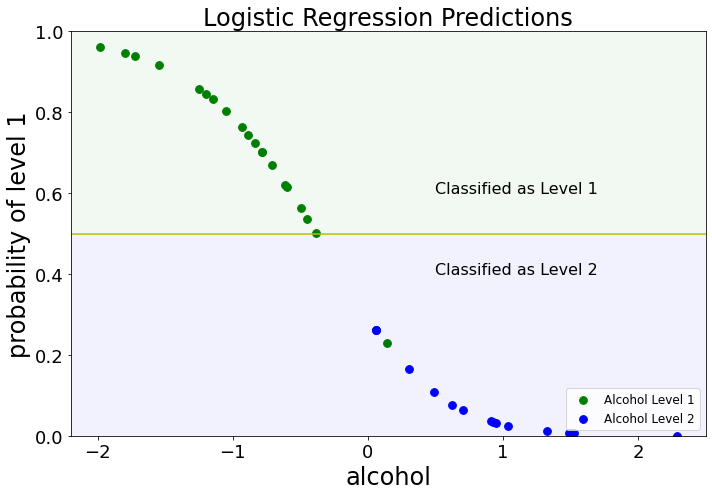

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


alcohol_level_1 = log_df['target'] == 1
alcohol_level_2 = log_df['target'] == 0

ax.scatter(log_df.loc[alcohol_level_1, 'alcohol'].values,
            log_df.loc[alcohol_level_1, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'Alcohol Level 1')


ax.scatter(log_df.loc[alcohol_level_2, 'alcohol'].values,
            log_df.loc[alcohol_level_2, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'Alcohol Level 2')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as Level 1', fontsize = 16)
ax.text(0.5, .4, 'Classified as Level 2', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('alcohol', fontsize = 24)
ax.set_ylabel('probability of level 1', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_wine
wine = load_wine()  
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=11)  # random_state for reproducibility

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

### Hyerparameter Tuning

In [ ]:
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
for k in range(1, 20, 2):  # k is an odd value 1-19; odd #s are less likely to generate ties 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=wine.data, y=wine.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=73.60%; standard deviation=3.93%
k=3 ; mean accuracy=71.35%; standard deviation=1.69%
k=5 ; mean accuracy=71.91%; standard deviation=2.25%
k=7 ; mean accuracy=71.91%; standard deviation=2.25%
k=9 ; mean accuracy=70.79%; standard deviation=5.62%
k=11; mean accuracy=70.22%; standard deviation=6.18%
k=13; mean accuracy=74.16%; standard deviation=3.37%
k=15; mean accuracy=72.47%; standard deviation=5.06%
k=17; mean accuracy=71.91%; standard deviation=4.49%
k=19; mean accuracy=72.47%; standard deviation=5.06%


In [ ]:
kfold = KFold(n_splits=20, random_state=11, shuffle=True)
for k in range(1, 20, 2):  # k is an odd value 1-19; odd #s are less likely to generate ties 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=wine.data, y=wine.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=77.57%; standard deviation=14.87%
k=3 ; mean accuracy=70.69%; standard deviation=13.53%
k=5 ; mean accuracy=69.65%; standard deviation=13.67%
k=7 ; mean accuracy=67.92%; standard deviation=15.52%
k=9 ; mean accuracy=70.69%; standard deviation=13.98%
k=11; mean accuracy=69.58%; standard deviation=13.36%
k=13; mean accuracy=67.85%; standard deviation=15.75%
k=15; mean accuracy=70.21%; standard deviation=15.84%
k=17; mean accuracy=70.28%; standard deviation=16.21%
k=19; mean accuracy=71.39%; standard deviation=16.67%


## Decision Tree Model

### Import Library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Decision Tree Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf.predict(X_test[0:10])

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1])

In [ ]:
score = clf.score(X_test, y_test)
print(score)

0.8444444444444444


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

C:\Users\coleb\AppData\Local\Temp\ipykernel_7536\1914883130.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


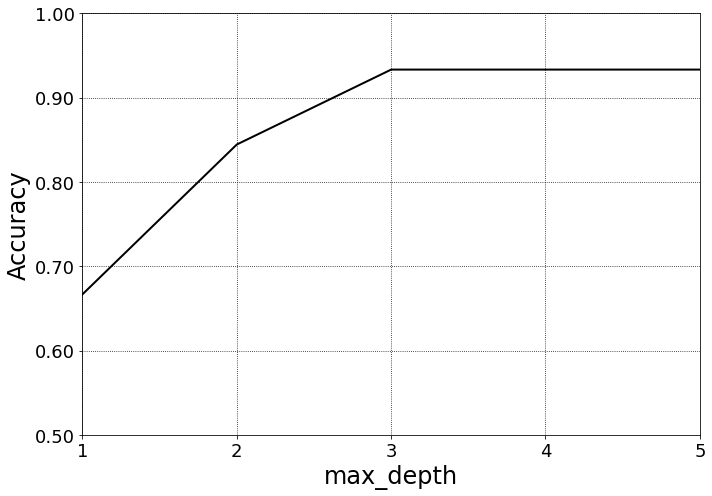

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

## Decision Tree Visualization

### Load Packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf.predict(X_test[0:2])

array([0, 2])

In [ ]:
score = clf.score(X_test, Y_test)
print(score)

0.8444444444444444


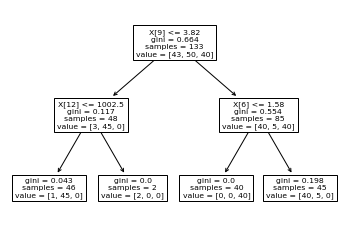

In [ ]:
tree.plot_tree(clf);

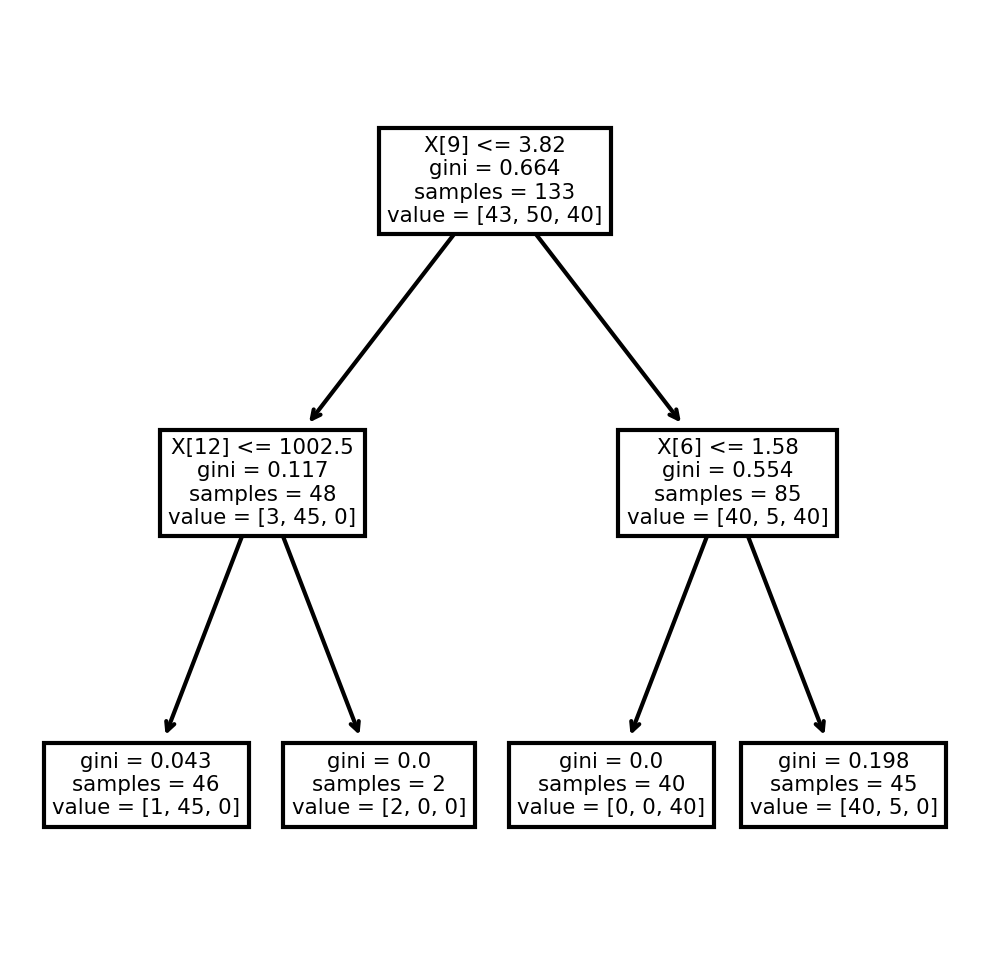

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
fn = ['alcohol','malic_acid','ash','alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
cn = ['Alcohol Level 1', 'Alcohol Level 2', 'Alcohol Level 3']

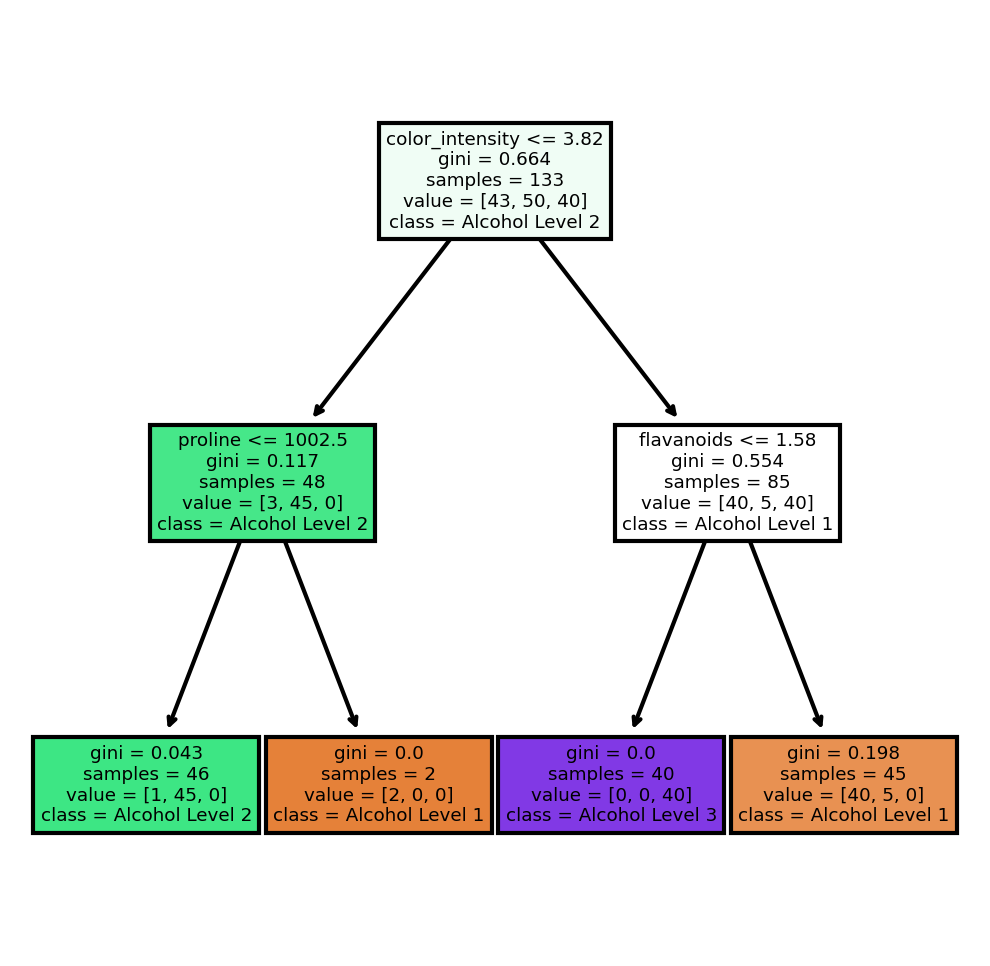

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')

## KNN 

### Load Packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

### Load Data

In [ ]:
# Store the feature data
X = data.data
# store the target data
y = data.target
Y = data.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Train the Data

In [ ]:
X_train.shape

(133, 13)

In [ ]:
X_test.shape

(45, 13)

In [ ]:
y_train.shape

(133,)

In [ ]:
y_test.shape

(45,)

## KNN 

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
features = ['alcohol','color_intensity']

# Create features matrix
x = df.loc[:, features].values

In [ ]:
y = data.target

In [ ]:
x = df.loc[:, features].values

In [ ]:
x = StandardScaler().fit_transform(x)

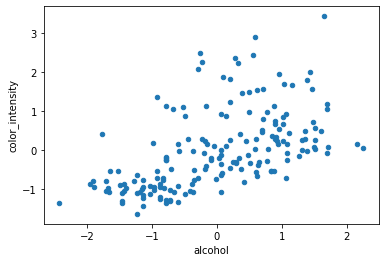

In [ ]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('alcohol','color_intensity' )

# Add labels
plt.xlabel('alcohol');
plt.ylabel('color_intensity');

In [ ]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
x = pd.DataFrame(x, columns = features)

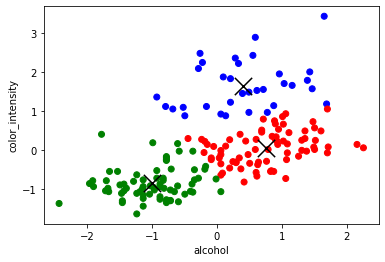

In [ ]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['alcohol'], x['color_intensity'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('alcohol')
plt.ylabel('color_intensity');

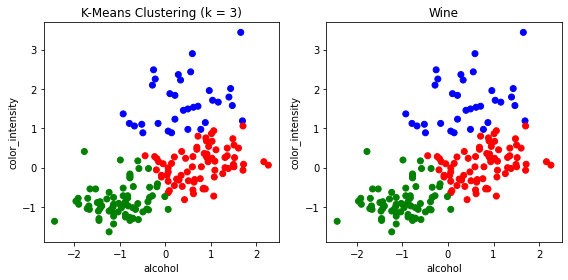

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['alcohol'], x['color_intensity'], c=colormap[labels])
plt.xlabel('alcohol')
plt.ylabel('color_intensity');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['alcohol'], x['color_intensity'], c=colormap[labels])
plt.xlabel('alcohol')
plt.ylabel('color_intensity');
plt.title('Wine')

plt.tight_layout()

## PCA

### Load Packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### Visualize Data

In [ ]:
pixel_colnames = df.columns[:-1]

In [ ]:
image_values = df.loc[0, pixel_colnames].values

In [ ]:
# plt.figure(figsize=(8,4))
# for index in range(0, 2):

#     plt.subplot(1, 2, 1 + index )
#     image_values = df.loc[index, 'alcohol'].values
#     image_label = df.loc[index, 'alcohol']
#     plt.imshow(image_values.reshape(28,28), cmap ='gray')
#     plt.title('Label: ' + str(image_label), fontsize = 18)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['alcohol'], random_state=0)

In [ ]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaledTrainImages = X_train.copy()

In [ ]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
speciesDict = {0: 'Alcohol Level 1', 1:'Alcohol Level 2', 2:'Alcohol Level 3'}

df.loc[:,'target'] = df.loc[:, 'target'].apply(lambda x: speciesDict[x])

In [ ]:
# Apply Standardization to features matrix X
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
# Make an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['Alcohol Level 1', 'Alcohol Level 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

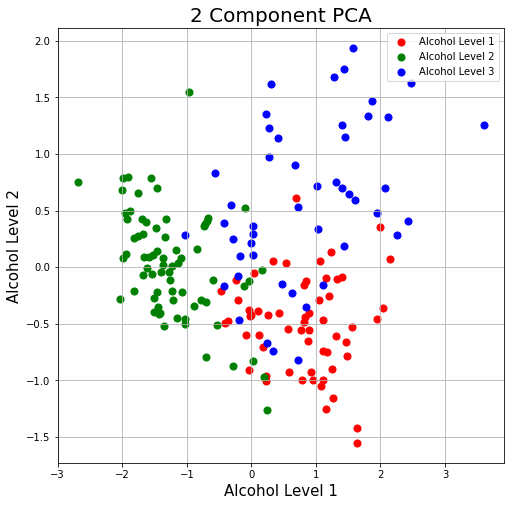

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df.loc[:, 'target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Alcohol Level 1']
               , finalDf.loc[indicesToKeep, 'Alcohol Level 2']
               , c = color
               , s = 50)

ax.set_xlabel('Alcohol Level 1', fontsize = 15)
ax.set_ylabel('Alcohol Level 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.7731821, 0.2268179])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999999999999


## Twitter Trends, Searches, and Sentiment

### Load API Keys
 


In [ ]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


### Basic Tweepy Commands

In [ ]:
cbhami02 = api.get_user('cbhami02')

In [ ]:
api = tweepy.API(auth)


In [ ]:
user_info = api.get_user(screen_name='cbhami02')
print(user_info)

User(_api=<tweepy.api.API object at 0x000001B65E949FA0>, _json={'id': 1515682874837643269, 'id_str': '1515682874837643269', 'name': 'Cole Hamilton', 'screen_name': 'Cbhami02', 'location': 'San Antonio, TX', 'profile_location': {'id': '3df4f427b5a60fea', 'url': 'https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json', 'place_type': 'unknown', 'name': 'San Antonio, TX', 'full_name': 'San Antonio, TX', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 90, 'listed_count': 0, 'created_at': 'Sun Apr 17 13:25:44 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 12, 'lang': None, 'status': {'created_a

In [ ]:
print(f'{user_info.followers_count} users are following {user_info.screen_name}.')

1 users are following Cbhami02.


In [ ]:
user_info.name  # name associated with the user’s account

'Cole Hamilton'

In [ ]:
user_info.screen_name  # user’s Twitter handle

'Cbhami02'

In [ ]:
user_info.description  # description from the user’s profile

'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.'

In [ ]:
user_info.status  # most recent tweet's text

Status(_api=<tweepy.api.API object at 0x000001B65E949FA0>, _json={'created_at': 'Sun May 08 17:12:29 +0000 2022', 'id': 1523350136771911681, 'id_str': '1523350136771911681', 'text': '“Data exploration and vizualization on COVID-19 with SQL\xa0, R, and Tableau— PART I” by Rym Bouchetara… https://t.co/iktoEG2xnu', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/iktoEG2xnu', 'expanded_url': 'https://twitter.com/i/web/status/1523350136771911681', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [102, 125]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 0, 'favorite_count': 0, 'favorited': False,

In [ ]:
print(f'{user_info.screen_name} is following {user_info.friends_count} users.')

Cbhami02 is following 90 users.


### Tweepy API User Info

In [ ]:
api = tweepy.API(auth)

In [ ]:
me = api.verify_credentials()

In [ ]:
me.name

'Cole'

In [ ]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 20 follower.
I am following 164 users.


### Rate Limits

In [ ]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1652229691},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1652229691},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1652229691},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1652229691},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1652229691},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1652229691},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1652229691},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1652229691},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1652229691},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1652229691},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1652229

In [ ]:
cbhami02=api.get_user(screen_name='cbhami02')


In [ ]:
print(api.rate_limit_status()['resources']['users']['/users/:id'])

{'limit': 900, 'remaining': 897, 'reset': 1652229679}


In [ ]:
print(api.rate_limit_status()['resources']['application']['/application/rate_limit_status'])

{'limit': 180, 'remaining': 180, 'reset': 1652229692}


### Followers

In [ ]:
cursor = tweepy.Cursor(api.followers)

In [ ]:
followers = []  # for storing followers' User objects
for account in cursor.items(15):  # request only 10 results (10 most recent followers in this case)
    followers.append(account.screen_name)

In [ ]:
print('Followers:', 
      ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers: 1SG_Hamilton adore_myBitches BrockCline ChildsSherry GucciManeNtail HamptonRFinest mwyattea OrderUpFayville PjCarl porge10 sayedabdulqadee shefferba49 soldiersofpaint VA_HomeLoan yongkuansima


In [ ]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)
followers = []
for account in cursor.items(10):  # request 2 pages of followers
    followers.append(account.screen_name)

print(followers)

['HadiHousseini2', 'alexsandraped10', 'vluiz04', 'TranTra01463289', 'Dannydoo44', 'House59174989', 'Ubaldopvtos', 'Dan64118697', 'mshollychesnut', 'Titogualtieri']


In [ ]:
cursor = tweepy.Cursor(api.followers_ids, screen_name='nasa', count=5000)
followers_ids = []
for accountid in cursor.items(5000): #request 1 page of follower_ids
    followers_ids.append(accountid)

In [ ]:
followers_ids_fragments = [followers_ids[i * 100:(i + 1) * 100] for i in range((len(followers_ids) + 100 - 1) // 100 )] 
print (followers_ids_fragments[0])

[1357511781434806272, 1283861283792658447, 1524182377605611523, 1524183292978896897, 1524183924615704576, 1524183907771555841, 1524183015227858944, 1524183097733832704, 1524183947999076359, 1524180191211368449, 1524168330420142081, 1524183402211069953, 1524183335773351938, 1524183580565405698, 1524182868838256640, 1524183698328985601, 1524183216831311872, 1213859921038430209, 1524180727109140480, 1524183462277783553, 1083257426906730496, 1198384893480329216, 1524183752062160903, 1524183673666473986, 1524182777754697728, 1510578030036586500, 1524183532855255043, 1524183672999616515, 1524181703933243392, 1524180968722116610, 1346483194133061634, 1508370180896075779, 1524183599871844352, 1524182085627518978, 1524183694424129538, 1524182141797609474, 1524181535502524416, 1524180902238113793, 1524183527390167040, 1524183434104508417, 1523849074163675136, 1505567091428143110, 1444466489684201477, 1524181189413777408, 1524183109549232128, 1524183017786429442, 1524179596043767809, 152417978643

### Rate Limits

In [ ]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])


{'limit': 15, 'remaining': 14, 'reset': 1652229694}


In [ ]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1652229695}


### Search Tweets by Topic

In [ ]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [ ]:
tweets = api.search(q='Johnny Depp', count=3)

In [ ]:
print_tweets(tweets) 

rain_hay: RT @bee_papaya: Amber Heard's biggest fear amid the false allegations against Johnny Depp was to be called a liar. Let that sink in.

#Just…

chosirian: RT @bee_papaya: Amber Heard tarnished Johnny Depp's good name, abused him, and made him re-live the nightmares of his childhood and adult l…

Rose53233: I'm calling bullshit on this one:

REAL abuse victims know the difference between actual abuse and a scammer trying… https://t.co/W88Grjls0v



In [ ]:
tweets = api.search(q='Johnny Depp :)', count=3) #Only "positive sentiment tweets involving basketball"

In [ ]:
tweets = api.search(q='#Heard', count=5)

In [ ]:
print_tweets(tweets)

cturtleemmers: WesternWoke: I know people feel extremely divided right now, but if I can hit pause for just a second on the bickering… If the j… https://t.co/WwSKhbA5M5

spaethon: #DeppVsHeard Day 15
7.
#Heard said there was blood everywhere, all over the pillow, she had a broken nose and maybe… https://t.co/aabGqTQoB9

DrSeldaYildiz: @DrProudman OMG!Can we(u) please stop polarizing, blaming ppl 4 seeing the truth. Instead focus on the evidence tha… https://t.co/8QgUQrPb00

spaethon: ...he's punching her still. #Heard lost her memory after than and then woke up. When she woke up, part of the bed w… https://t.co/BUib3vrx9q



### Trends Available

In [ ]:
trends_available = api.trends_available()

In [ ]:
len(trends_available)

467

In [ ]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [ ]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [ ]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [ ]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [ ]:
world_trends[4]

{'name': '竜ちゃん',
 'url': 'http://twitter.com/search?q=%E7%AB%9C%E3%81%A1%E3%82%83%E3%82%93',
 'promoted_content': None,
 'query': '%E7%AB%9C%E3%81%A1%E3%82%83%E3%82%93',
 'tweet_volume': 28565}

In [ ]:
for iter in range(3):
    print(world_trends[iter])

{'name': '上島さん', 'url': 'http://twitter.com/search?q=%E4%B8%8A%E5%B3%B6%E3%81%95%E3%82%93', 'promoted_content': None, 'query': '%E4%B8%8A%E5%B3%B6%E3%81%95%E3%82%93', 'tweet_volume': 278821}
{'name': 'ショック', 'url': 'http://twitter.com/search?q=%E3%82%B7%E3%83%A7%E3%83%83%E3%82%AF', 'promoted_content': None, 'query': '%E3%82%B7%E3%83%A7%E3%83%83%E3%82%AF', 'tweet_volume': 65567}
{'name': '#SalarioRosaVePorMas', 'url': 'http://twitter.com/search?q=%23SalarioRosaVePorMas', 'promoted_content': None, 'query': '%23SalarioRosaVePorMas', 'tweet_volume': 63980}


In [ ]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 24
Total world trends >100k volume: 3


### World_Trends

In [ ]:
from operator import itemgetter 

In [ ]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 24


In [ ]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [ ]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

#CafStinks
#Eurovision
上島さん
芸人さん
ショック
Rick Scott
#SalarioRosaVePorMas
Araujo
iPod
Gago


### SA_Trends

In [ ]:
SA_trends_comp = api.trends_place(id=2487796)

In [ ]:
SA_trends = SA_trends_comp[0]['trends']

In [ ]:
SA_trends_baseline = [t for t in SA_trends if t['tweet_volume']]

In [ ]:
for trend in SA_trends_baseline:
    print(trend)

{'name': 'TONY MONTANA', 'url': 'http://twitter.com/search?q=%22TONY+MONTANA%22', 'promoted_content': None, 'query': '%22TONY+MONTANA%22', 'tweet_volume': 397425}
{'name': 'Cruz', 'url': 'http://twitter.com/search?q=Cruz', 'promoted_content': None, 'query': 'Cruz', 'tweet_volume': 84515}
{'name': 'Correa', 'url': 'http://twitter.com/search?q=Correa', 'promoted_content': None, 'query': 'Correa', 'tweet_volume': 21488}
{'name': '#LeahisOurAnnabeth', 'url': 'http://twitter.com/search?q=%23LeahisOurAnnabeth', 'promoted_content': None, 'query': '%23LeahisOurAnnabeth', 'tweet_volume': 47825}
{'name': '#Bidenflation', 'url': 'http://twitter.com/search?q=%23Bidenflation', 'promoted_content': None, 'query': '%23Bidenflation', 'tweet_volume': 21908}
{'name': 'Jessica', 'url': 'http://twitter.com/search?q=Jessica', 'promoted_content': None, 'query': 'Jessica', 'tweet_volume': 88608}
{'name': 'Azuki', 'url': 'http://twitter.com/search?q=Azuki', 'promoted_content': None, 'query': 'Azuki', 'tweet_vo

In [ ]:
print(f'SA trends >15k volume: {len(SA_trends_baseline)}')


SA trends >15k volume: 20


In [ ]:
SA_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) 

In [ ]:
for trend in SA_trends_baseline[:20]:
    print(trend['name'])

TONY MONTANA
Azuki
Jessica
Cruz
Rick Scott
Medicare
iPod
#LeahisOurAnnabeth
Ultra MAGA
Wayne
#Bidenflation
Correa
Wallo
Devils
Montreal
#inflation
Hilary Duff
Duncan
Carti
Hurricane Gun


In [ ]:
SA_topics = {}  # dictionary to store trend names and volumes for San Antonio


In [ ]:
print(SA_topics)

{}


In [ ]:
for trend in SA_trends_baseline:
    SA_topics[trend['name']] = trend['tweet_volume']

In [ ]:
import pandas as pd

SAdf = pd.DataFrame(SA_topics, index = [0]) 

In [ ]:
SAdf.head()

,TONY MONTANA,Azuki,Jessica,Cruz,Rick Scott,Medicare,iPod,#LeahisOurAnnabeth,Ultra MAGA,Wayne,#Bidenflation,Correa,Wallo,Devils,Montreal,#inflation,Hilary Duff,Duncan,Carti,Hurricane Gun
0,397425,106628,88608,84515,64054,60673,57942,47825,35887,34194,21908,21488,15708,13514,12671,12066,11626,11196,10629,10316


<AxesSubplot:title={'center':'Trends in San Antonio'}, xlabel='Trends', ylabel='Count'>

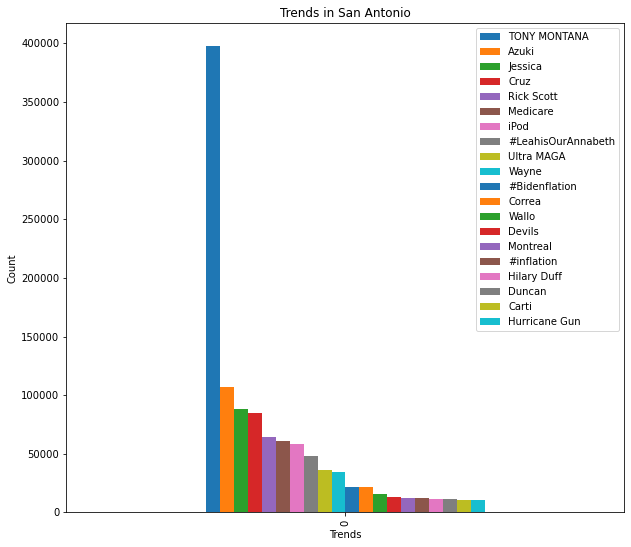

In [ ]:
#Plot Descending
SAdf.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="Trends in San Antonio")

### WordCloud for SA_Trends

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))

wordcloud_SA = WordCloud(mask=mask, width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=10, colormap='prism', 
    background_color='white')

In [ ]:
wordcloud_SA = wordcloud_SA.fit_words(SA_topics)

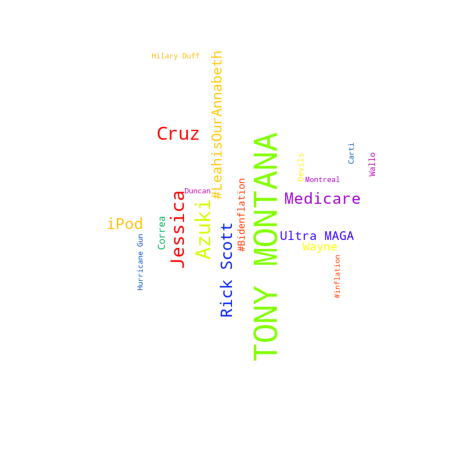

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_SA)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [ ]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [ ]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [ ]:
p.clean(tweet_text)

'A sample retweet with a URL'

### Tweet Listener - Load Top Three Trends

In [ ]:
tweetlistraw1,tweetlistprep1 = prepsubject('Macron',20)
tweetlistraw2,tweetlistprep2 = prepsubject('Ranboo',20)
tweetlistraw3,tweetlistprep3 = prepsubject('Publix',20)

### Number 1 Tweet Topic

In [ ]:
tweetlistraw1

['RT @mhmck: French President Emmanuel Macron says "don\'t humiliate Russia".\n\nI say don\'t humiliate Ukraine, as France did in 1919 when the T…',
 'RT @Fatassinari: ATM Macron’s proposal suspiciously resembles the EU’s moribund Neighbourhood Policy. That can be summarised by Prodi’s 20…',
 'RT @mhmck: Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.\n\nThe Ru…',
 "@BobRuth12 @thetimes Didn't #Putin already fool #Macron by saying there was never going to be an invasion of… https://t.co/5fjozM56q1",
 "RT @KyleWOrton: #France's President Macron digging in on the mistakes with #Russia and expanding them to #China https://t.co/TtZBWOtZqu",
 'RT @mhmck: Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.\n\nThe Ru…',
 '@EerikNKross On the other hand it must be extremely patronizing and humiliating for Putin to hear Macron treating h… https://t.co/M4F

In [ ]:
tweetlistprep1

[': French President Emmanuel Macron says "don\'t humiliate Russia".I say don\'t humiliate Ukraine, as France did in when the T',
 ': ATM Macrons proposal suspiciously resembles the EUs moribund Neighbourhood Policy. That can be summarised by Prodis',
 ': Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.The Ru',
 "Didn't already fool by saying there was never going to be an invasion of",
 ": 's President Macron digging in on the mistakes with and expanding them to",
 ': Ukraine is the only fighting defender of Europe. Emmanuel Macron says it will take "decades" for Ukraine to join the EU.The Ru',
 'On the other hand it must be extremely patronizing and humiliating for Putin to hear Macron treating h',
 ': Macron clearly has a wrong address for his "don\'t humiliate Russia" call. This should be told to Putin, his gang and the R',
 ': Macron clearly has a wrong address for his "don\'t humiliate Russia" call. This shou

### Number 2 Tweet Topic

In [ ]:
tweetlistraw2

['RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'i feel like ranboo would love the sci guys',
 '#ranboospace\nRanboo do you know any Kevins? I have this theory that all the Kevins are going feral /hj https://t.co/FFcZzH75Fr',
 'RT @PlantOnSpace: He is king of the birds\n#ranboo #ranboofanart https://t.co/OCupXInjRK',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RANBOO DID A SPACE??',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @hankgreen: @hichewchao Ranboo is definitely part T-rex.',
 'RT @RanbooUpdates: Ranboo posted on his Instagram Story! :D https://t.co/NLpmgrahaX',
 'Why do I have a sense that Ranboo was

In [ ]:
tweetlistprep2

[': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 'i feel like ranboo would love the sci guys',
 'do you know any Kevins? I have this theory that all the Kevins are going feral /hj',
 ': He is king of the birds',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 'RANBOO DID A SPACE??',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo is definitely part T-rex.',
 ': Ranboo posted on his Instagram Story!',
 'Why do I have a sense that Ranboo was somehow in ISWM (in space with Markiplier) and we never knew',
 ': Markiplier RanbooThinks that space is really cool',
 ': XIAOBOO [ rts appreciated ]',
 'just chilling with hank green listenting to ranboo talking about lobotomy',
 'OH ITS IN THE RANBOO SPACEIM SMART',
 'Listening to a ranboo space is so confusing because one minute we are talking about pigeons , then death

### Number 3 Tweet Topic

In [ ]:
tweetlistraw3

['@ACatNamedMo what was the name of that wine at Publix you raves about?',
 '@nandorvila In the same vein, I was in a little Havana Publix yesterday and one of my fellow Cubans was just casual… https://t.co/YThjangR2r',
 'I confidently shop at Publix now. Inflation is everywhere .. minus well.',
 'RT @overtime: Bro was so disappointed in himself 😭\n(via publix.ale/TT) https://t.co/mcPfeiRzbg',
 "@Marla_Knits @Franktheshank88 It's been a little different the last couple of years.\nCan't tell you how many Publix… https://t.co/bZzCvtdQ31",
 '@marcodupa If nana can be fully alive working at Publix throwin subs together you can manage.',
 '@PublixHelps Thank you.His name is Jorge Espinel at the Hallandale beach FL 402 liquor store.He’s always so nice to… https://t.co/Y14vyXJJ01',
 'Proud of myself today. I Walked through the entire Publix bakery section &amp; made it through without a single treat i… https://t.co/a4hhFvjt0T',
 'Publix put a piece of chicken in my potato wedge bag they tried

In [ ]:
tweetlistprep3

['what was the name of that wine at Publix you raves about?',
 'In the same vein, I was in a little Havana Publix yesterday and one of my fellow Cubans was just casual',
 'I confidently shop at Publix now. Inflation is everywhere .. minus well.',
 ': Bro was so disappointed in himself (via publix.ale/TT)',
 "It's been a little different the last couple of years.Can't tell you how many Publix",
 'If nana can be fully alive working at Publix throwin subs together you can manage.',
 'Thank you.His name is Jorge Espinel at the Hallandale beach FL liquor store.Hes always so nice to',
 'Proud of myself today. I Walked through the entire Publix bakery section &amp; made it through without a single treat i',
 'Publix put a piece of chicken in my potato wedge bag they tried to murder me',
 "- James Cromwell's protest is interesting. Vegan milk used to be more expensive. Now",
 'i love publix',
 'I always want a Publix chicken tender wrap. The only time I dont want a Publix chicken tender wrap i

## Stream

### Load Packages

In [ ]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [ ]:
run sentimentlistener.py "#Macron" 20

KeyboardInterrupt: 

### Sentiment Listener Topic 2

In [ ]:
run sentimentlistener.py "Ranboo" 20

+ mellohayl: dream saying that ranboo talking about being unlabeled was really validating LET ME GO CRY

  beloved_natalia: DREAM AND RANBOO CRUMBS

- bbygnf: dream saying he felt validated by ranboo excuse me while i SOB MY FUCKING EYES OUT 😭💗💗💗

  Mistoazt: @Rosemybeloved_ RANBOO CAME OUT

+ patito4k: what a great day to be unlabeled. SO PROUD OF YOU RANBOO 💗

+ dogIove24: @dreamsecretclub SO TRUE!! im so proud of ranboo

+ karlseuphoria: I MISSED THE ANNOUNCEMENT BUT IM SO PROUD OF RANBOO OHMMYOGD

  gnfs4k: RANBOO AND DREAM 🥹🥹🥹🥹❤️❤️❤️❤️❤️

  purple_sockss: @dreamsecretclub go ranboo go

+ incelbr: ranboo Coming out gave me whiplash like I completely forgot LGBTQ's were real

+ kaylaXcorpse: @dreamsecretclub Love for ranboo &lt;33

- euthymiapIane: MCYT DSMP RANBOO IS GAY IM SORRY I DONT REALLY CARE BUT THATS CRAZY

+ darlenedytee: i am fucking sobbing dream you whore i lovw you so much how could you do tihs to me i am so proud of you and ranboo…

+ planet_marss_: OH RANBOO LIKE ACT

### Sentiment Listener Topic 3

In [ ]:
run sentimentlistener.py "Publix" 20

  AVR19741: @MiaCathell @JZubosky @Jack_Petocz @Publix Oh please. You demeaned his work, just take the L on this and move on.

+ DalyKenan: @Jack_Petocz @Publix It’s not the Dint say gay bill, that is a fiction.

  Lorigoldst: @Jack_Petocz @grampage_on @Publix I stopped shopping at Publix when I saw they were big contributors for 2nd Amendm…

  trudy_mcquiston: @klmcgee1978 @ProudTwinkie @TaylorLorenz Publix hires at 14.

  red_nov3: @AdamSchiavone @TimRunsHisMouth @Jack_Petocz @Publix “The party of working people?” So workers belong to one party…

+ SharkeyTim: @Jack_Petocz @Publix So brave. Yet so ignorant.

+ CircusHypocrisy: @Jack_Petocz @Publix Public is great. They’ll figure out a way to hire another $10 per hour overly sensitive and fragile cashier boy.

  JerseyMade93: Oh Publix racists

  Garyknowsitall: @davidhogg111 @ChristinaPushaw Jack started working at Publix when he was 13? Doubt it. Either way, youth is no fre…

  AdamMathisFL: @exjon Have it had their sammiches? Publi

In [ ]:
dftrend1 = pd.DataFrame({'Positive' : [15],
'Neutral' : [4],
'Negative' : [1]})
dftrend1.head()


,Positive,Neutral,Negative
0,15,4,1


In [ ]:
dftrend2 = pd.DataFrame({'Positive' : [11],
'Neutral' : [6],
'Negative' : [3]})
dftrend2.head()


,Positive,Neutral,Negative
0,11,6,3


In [ ]:
dftrend3 = pd.DataFrame({'Positive' : [7],
'Neutral' : [11],
'Negative' : [2]})
dftrend3.head()
#dftrend1.to_csv('dfs.csv', index = False)

,Positive,Neutral,Negative
0,7,11,2


<AxesSubplot:title={'center':'#1 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

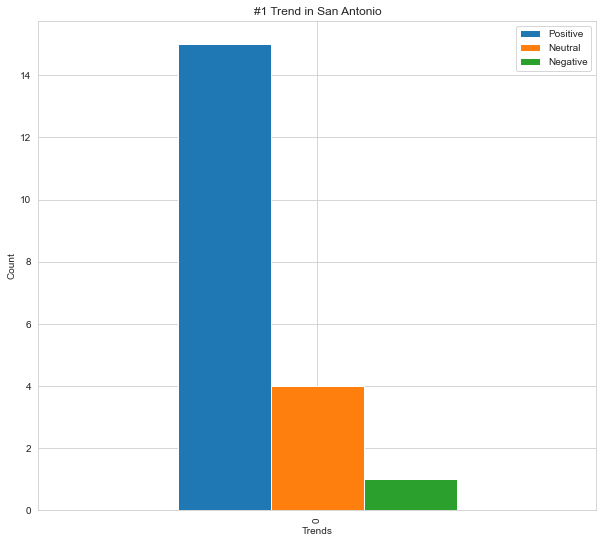

In [ ]:
dftrend1.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#1 Trend in San Antonio")

<AxesSubplot:title={'center':'#2 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

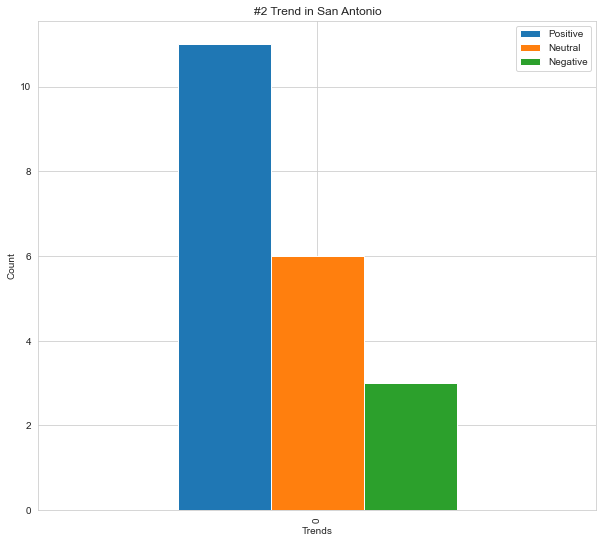

In [ ]:
dftrend2.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#2 Trend in San Antonio")

<AxesSubplot:title={'center':'#3 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

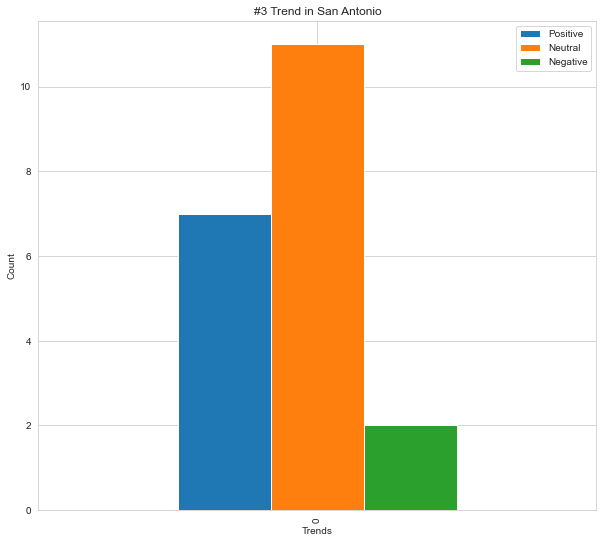

In [ ]:
dftrend3.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#3 Trend in San Antonio")

## Geocoding

In [ ]:
import os
from geopy import OpenMapQuest

In [ ]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222',
             'El Alamein، Egypt']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [ ]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0)),
 Location(العلمين, مطروح, مصر, (30.833944, 28.949268, 0.0))]

In [ ]:
from tweetutilities import get_tweepy_API

In [ ]:
api = get_tweepy_API()

In [ ]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [ ]:
from locationlistener import LocationListener

In [ ]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Will Smith', limit=150)

In [ ]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [ ]:
stream.filter(track=['Will Smith'], languages=['en'], is_async=False)

rmossconti: being able to recall various hilarious Will Smith rap lines is both a gift and a curse but can proudly say I’ve got… https://t.co/ehyZctJ2Ad



In [ ]:
counts['total_tweets'] #total tweets examined

8

In [ ]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

4

In [ ]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

50.0%


In [ ]:
from tweetutilities import get_geocodes

In [ ]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [ ]:
tweet_locations_fail

1

In [ ]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

25.0% of the locations could not be deciphered.


### Location Listener DataFrame

In [ ]:
import pandas as pd

In [ ]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft = dft.dropna()

In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft2.shape

(4, 3)

In [ ]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [ ]:
import folium

In [ ]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [ ]:
usmap.save('base_map.html')

In [ ]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

AttributeError: 'Pandas' object has no attribute 'latitude'

In [ ]:
usmap.save('tweet_map.html')

In [ ]:
usmap

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [ ]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [ ]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [ ]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [ ]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [ ]:
import json

In [ ]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [ ]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [ ]:
tweets_from_json

[{'screen_name': 'therealjayber',
  'text': 'Imagine the kind of spellbinding power that Jada wields over Will Smith.\n\nOne unhappy look, and Will was immediatel… https://t.co/lOkKii20KH',
  'location': 'Tweet Smarter. Grow Faster. 👉'},
 {'screen_name': 'chomps443',
  'text': '@LeafyIsHere Will Smith should be white',
  'location': 'The motion of the Ocean'},
 {'screen_name': 'biplov_jha',
  'text': 'What have we learned from Will Smith and Johnny Depp?',
  'location': 'Nepal'},
 {'screen_name': 'KassAssassin',
  'text': 'I know his is ridiculous, but what upsets me the most about the Will Smith thing is, after getting slapped, Chris R… https://t.co/G3oxLaZ7ta',
  'location': 'Brooklyn, NY'}]

C:\Users\coleb\mambaforge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


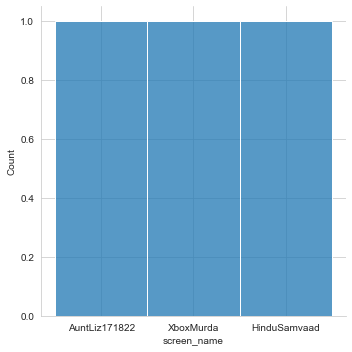

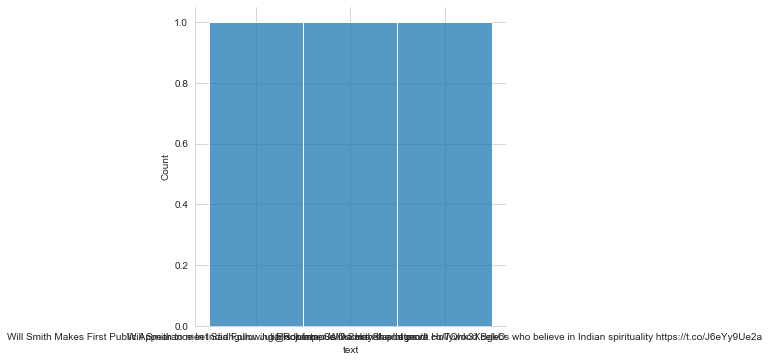

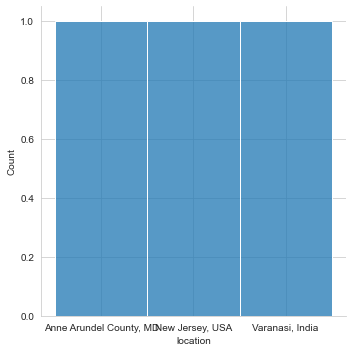

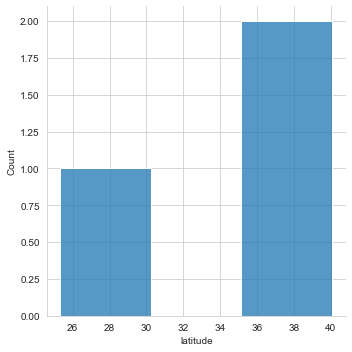

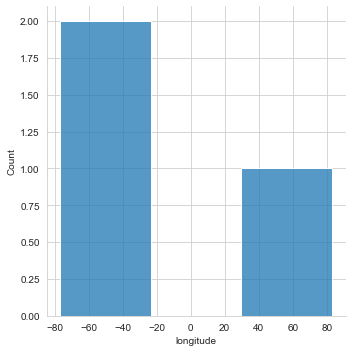

In [ ]:
for column in dft:
    sns.displot(x=column, data=dft)

In [ ]:
dft.corr()

,latitude,longitude
latitude,1.000000,-0.996873
longitude,-0.996873,1.000000


In [ ]:
dft.describe()

,latitude,longitude
count,3.000000,3.000000
mean,34.794549,-22.656662
std,8.210207,91.514389
min,25.335649,-76.573454
25%,32.153954,-75.488808
50%,38.972258,-74.404162
75%,39.523998,4.301733
max,40.075738,83.007629


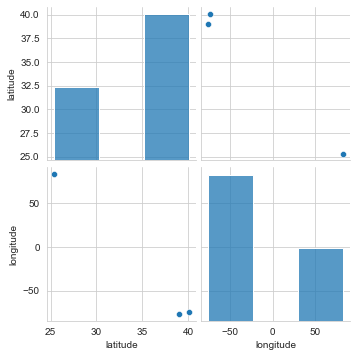

In [ ]:
sns.pairplot(dft)